In [112]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from random import sample

In [113]:
sample_log_file_1 = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/validation/ds1-0_logs_mu-sigma-beta-old-small-old-big.log")
sample_log_file_2 = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/validation/ds1-0_logs_mu-sigma.log")
reference_log_file = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/beast/ds1-0.log")

In [114]:
NUM_PAIRS = 1000

In [115]:
sample_logs_1 = pd.read_csv(sample_log_file_1)
sample_logs_2 = pd.read_csv(sample_log_file_2)
reference_logs = pd.read_csv(reference_log_file, delimiter="\t", comment="#")

In [116]:
sample_log_posteriors_1 = dict(
    zip(
        sample_logs_1.state,
        sample_logs_1.posterior,
    )
)
sample_log_posteriors_2 = dict(
    zip(
        sample_logs_2.state,
        sample_logs_2.posterior,
    )
)
reference_log_posteriors = dict(
    zip(reference_logs.Sample.map(lambda x: f"STATE_{x}"), reference_logs.posterior)
)

# states = list(reference_log_posteriors.keys())

# log_errors = []
# for _ in range(NUM_PAIRS):
#     state_a, state_b = sample(states, 2)
#     ref_log_posterior_diff = (
#         reference_log_posteriors[state_a] - reference_log_posteriors[state_b]
#     )
#     sample_log_posterior_diff = (
#         sample_log_posteriors[state_a] - sample_log_posteriors[state_b]
#     )

#     error = ref_log_posterior_diff - sample_log_posterior_diff
#     log_errors.append(error)

# sns.histplot(log_errors, stat="density")

# plt.xlabel("Pairwise posterior ratio error")

# plt.savefig(GRAPHS_DIR / f"{analysis_name}_approximation-error.png", dpi=300)
# plt.clf()
# plt.close()

In [123]:
import matplotlib.pyplot as plt

states = list(reference_log_posteriors.keys())

log_errors = []
for _ in range(NUM_PAIRS):
    state_a, state_b = sample(states, 2)
    ref_log_posterior_diff = (
        reference_log_posteriors[state_a] - reference_log_posteriors[state_b]
    )
    sample_log_posterior_diff = (
        sample_log_posteriors_1[state_a] - sample_log_posteriors_1[state_b]
    )

    error = ref_log_posterior_diff - sample_log_posterior_diff
    log_errors.append(error)

np.mean(np.abs(np.ma.masked_invalid(log_errors)))

np.float64(276352.795442698)

In [120]:
import matplotlib.pyplot as plt

states = list(reference_log_posteriors.keys())

log_errors = []
for _ in range(NUM_PAIRS):
    state_a, state_b = sample(states, 2)
    ref_log_posterior_diff = (
        reference_log_posteriors[state_a] - reference_log_posteriors[state_b]
    )
    sample_log_posterior_diff = (
        sample_log_posteriors_2[state_a] - sample_log_posteriors_2[state_b]
    )

    error = ref_log_posterior_diff - sample_log_posterior_diff
    log_errors.append(error)

np.mean(np.abs(np.ma.masked_invalid(log_errors)))

np.float64(71.85592864051947)

<Axes: >

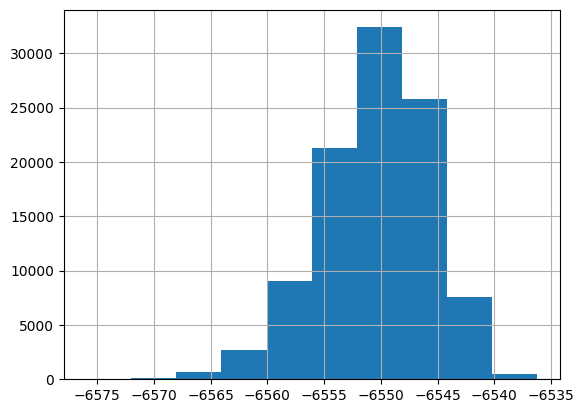

In [95]:
reference_logs.posterior.hist()

<Axes: >

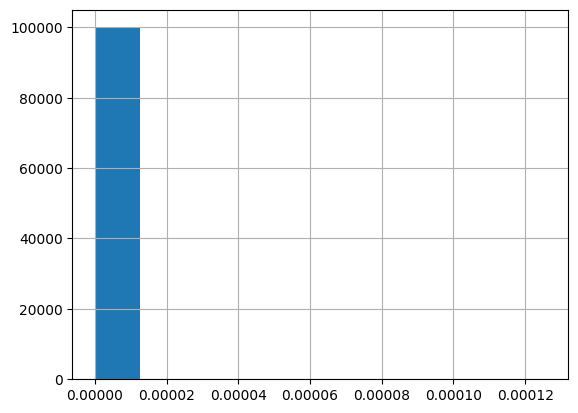

In [98]:
sample_logs_1.posterior.hist()

In [97]:
sample_logs_2.posterior.value_counts()

posterior
0.000000e+00     9
2.641679e-64     1
9.129729e-55     1
8.042549e-117    1
9.343250e-42     1
                ..
1.639516e-19     1
6.286218e-18     1
1.968095e-31     1
1.273467e-35     1
2.630115e-15     1
Name: count, Length: 99993, dtype: int64